## Credit Card Fraud Detection

Before dealing with any kind fraud detection datasets, we should have basic knowledge on handling the imbalanced data. In this notebook you will be gathering an insight of how to handle imbalanced data and 2 simple techniques and using neural networks at the end for training and preditiction.

### Gathering insight of the Data

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('F:/creditcard.csv')

In [2]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Checking for Nan values

In [3]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

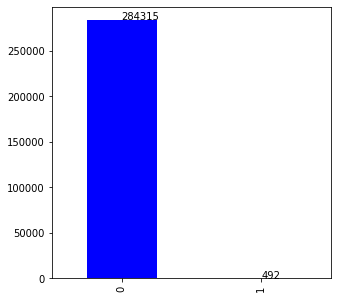

In [7]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
data['Class'].value_counts().plot.bar(color = ['blue', 'red'],figsize = (5,5))
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

Here we are checking the correlation with all features to Column Class.  

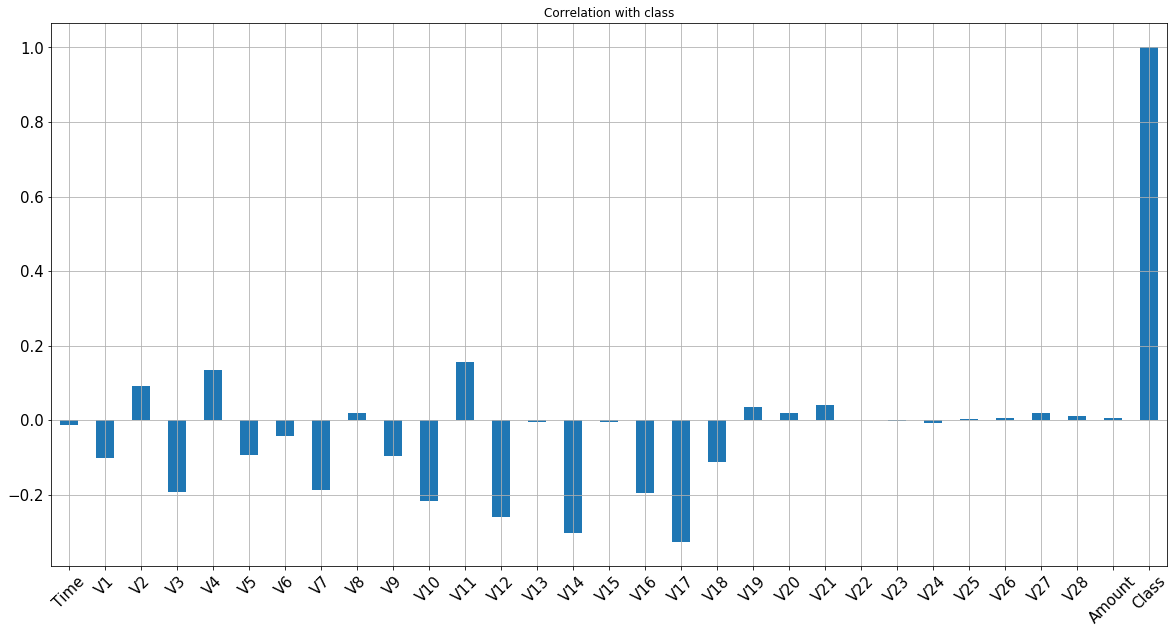

In [6]:
data.corrwith(data.Class).plot.bar(figsize = (20,10),title = "Correlation with class", fontsize = 15, rot = 45, grid = True)

In [6]:
corr = data.corr()

Plotting the heat with mask  of upper triangle and generating a custom diverging color map.

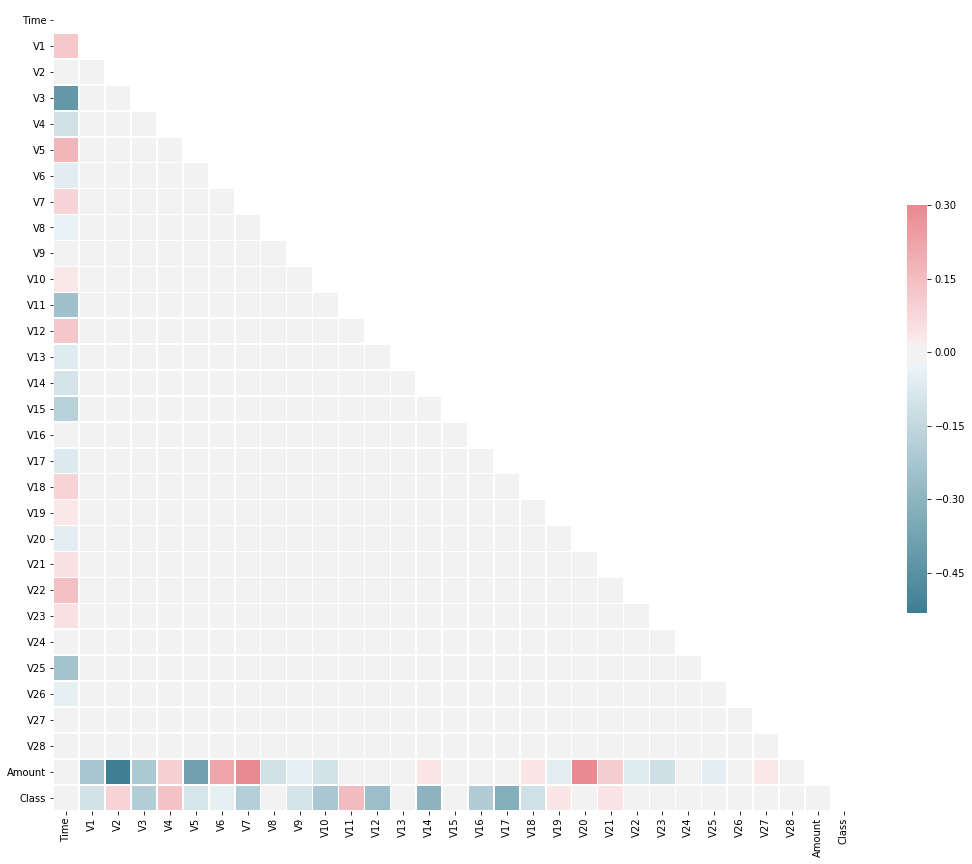

In [7]:
import seaborn as sns
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize = (18,15))
cmap = sns.diverging_palette(220,10,as_cmap = True)
sns.heatmap(corr,mask = mask, cmap = cmap, vmax = 0.3, center = 0, square = True, linewidths = 0.5, cbar_kws = {"shrink":0.5})
plt.show()

By seeing the distributions we can have an idea how skewed are these features, we can also see further distributions of the other features. There are techniques that can help the distributions be less skewed which will be implemented in this notebook in the future.

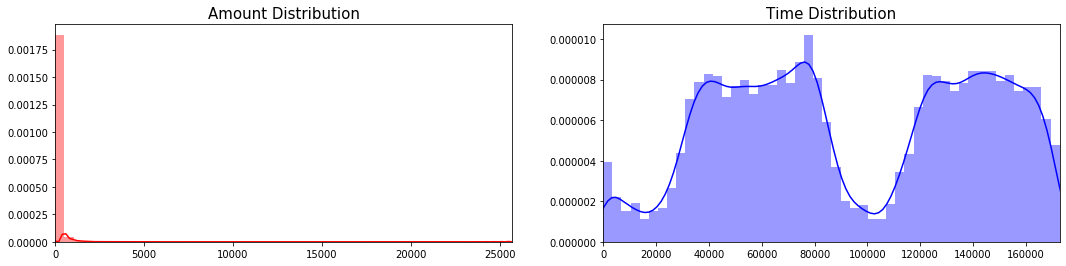

In [8]:
fig,ax = plt.subplots(1,2,figsize =(18,4))
amt_val = data['Amount'].values
time_val = data['Time'].values

sns.distplot(amt_val,ax = ax[0], color = 'r')
ax[0].set_title('Amount Distribution',fontsize = 15)
ax[0].set_xlim(min(amt_val),max(amt_val))

sns.distplot(time_val, ax = ax[1], color = 'b')
ax[1].set_title('Time Distribution', fontsize = 15)
ax[1].set_xlim(min(time_val), max(time_val))

plt.show()

### Scaling and Splitting

We know that Time and Amount features are not scaled. So here we scale the two fetures using Robust Scaler and then replace them with the original features.

In [9]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
scaled_time = rs.fit_transform(data['Time'].values.reshape(-1,1))
scaled_amt = rs.fit_transform(data['Amount'].values.reshape(-1,1))
data['scaled_time'] = scaled_time
data['scaled_amt'] = scaled_amt
data = data.drop(['Time','Amount'],axis =1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amt
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


Before proceeding with the Random UnderSampling technique we have to separate the orginal dataframe. Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.

In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold
skf = StratifiedKFold(n_splits = 5, shuffle = False, random_state = 0)
X = data.drop('Class',axis = 1)
y = data['Class']

In [11]:
for train_index,test_index in skf.split(X,y):
    print("Train :",  train_index, "Test :", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]


original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Train : [ 30473  30496  31002 ... 284804 284805 284806] Test : [    0     1     2 ... 57017 57018 57019]
Train : [     0      1      2 ... 284804 284805 284806] Test : [ 30473  30496  31002 ... 113964 113965 113966]
Train : [     0      1      2 ... 284804 284805 284806] Test : [ 81609  82400  83053 ... 170946 170947 170948]
Train : [     0      1      2 ... 284804 284805 284806] Test : [150654 150660 150661 ... 227866 227867 227868]
Train : [     0      1      2 ... 227866 227867 227868] Test : [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


We will implement "Random Under Sampling" which basically consists of removing data in order to have a more balanced dataset and thus avoiding our models to overfitting.

In [12]:
data = data.sample(frac = 1)
fraud_data = data.loc[data['Class'] == 1]
nofraud_data = data.loc[data['Class'] == 0][:492]
normalized_data = pd.concat([fraud_data,nofraud_data])

new_data = normalized_data.sample(frac = 1, random_state = 42)
new_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amt
101169,-1.024745,-0.359194,2.993225,-1.503560,-1.306346,0.900607,-1.030959,0.719103,0.249091,-0.033830,...,0.860576,-0.304981,0.020138,0.385871,-0.103779,0.219553,0.102421,0,-0.199086,-0.279466
57248,-0.887287,1.390002,1.219686,1.661425,1.009228,-0.733908,0.855829,0.000077,-1.275631,-0.433394,...,-0.346930,-0.050619,0.231044,-0.450760,-0.376205,0.034504,0.157775,1,-0.433111,-0.201495
210680,2.079396,0.068163,-1.351679,0.325873,0.128851,-1.258623,0.333979,-0.460518,0.440195,-0.018036,...,0.937079,-0.034174,-0.042785,0.324006,-0.105493,-0.013171,-0.057253,0,0.627240,-0.243415
123238,1.140208,1.156431,-1.471578,2.076278,0.774809,-1.002532,0.264948,0.013162,0.248835,-2.100667,...,-0.866812,-0.121583,-0.356109,0.634573,-0.306311,0.094087,0.121065,1,-0.092048,-0.293440
143336,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,-8.537758,...,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,1,0.006967,3.226717


Here we can see the new data with balanced fraud and non fraud transactions. With the help of this new data we can use it for predective analysis. 

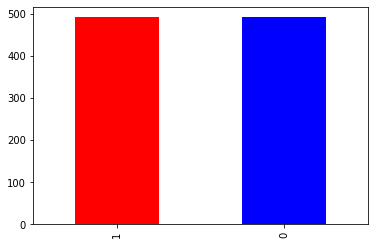

In [13]:
new_data['Class'].value_counts().plot.bar(color = ['red','blue'])

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific transaction is a fraud. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to fraud transactions.

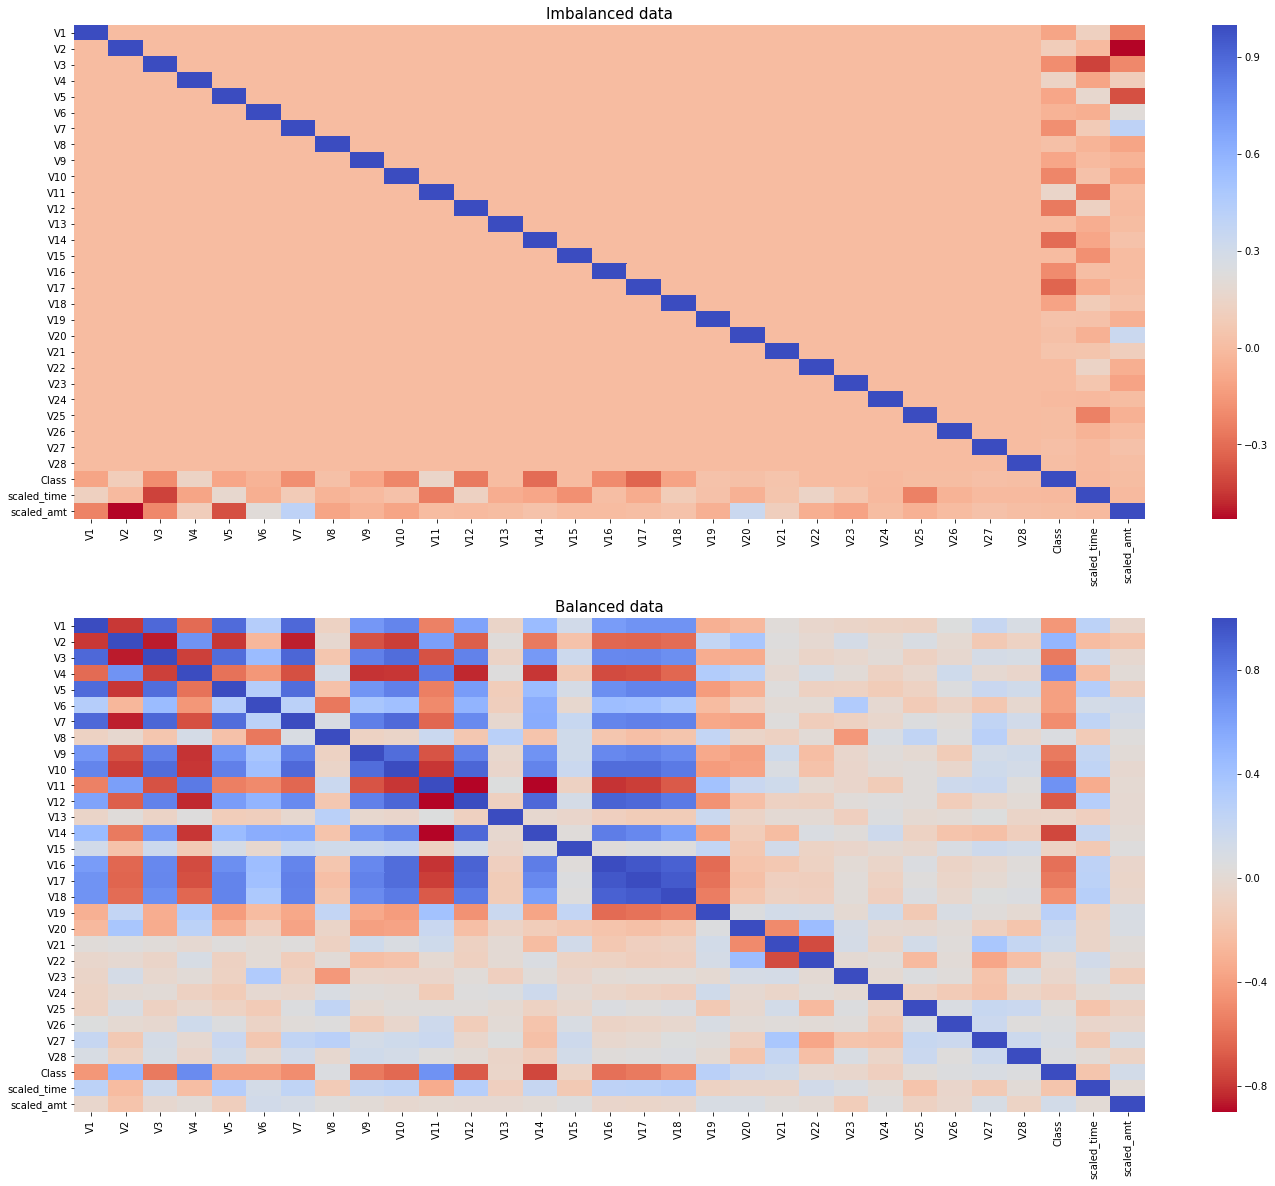

In [14]:
fig,ax = plt.subplots(2,1, figsize = (24,20))

corr = data.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', ax = ax[0])
ax[0].set_title('Imbalanced data',fontsize = 15)


corr = new_data.corr()
sns.heatmap(corr, cmap = 'coolwarm_r',ax = ax[1])
ax[1].set_title("Balanced data", fontsize = 15)

plt.show()

### Outlier Removal Tradeoff:

We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.


#### The Tradeoff: 

The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

Visualize Distributions: We first start by visualizing the distribution of the feature we are going to use to eliminate some of the outliers. V14 is the only feature that has a Gaussian distribution compared to features V12 and V10.

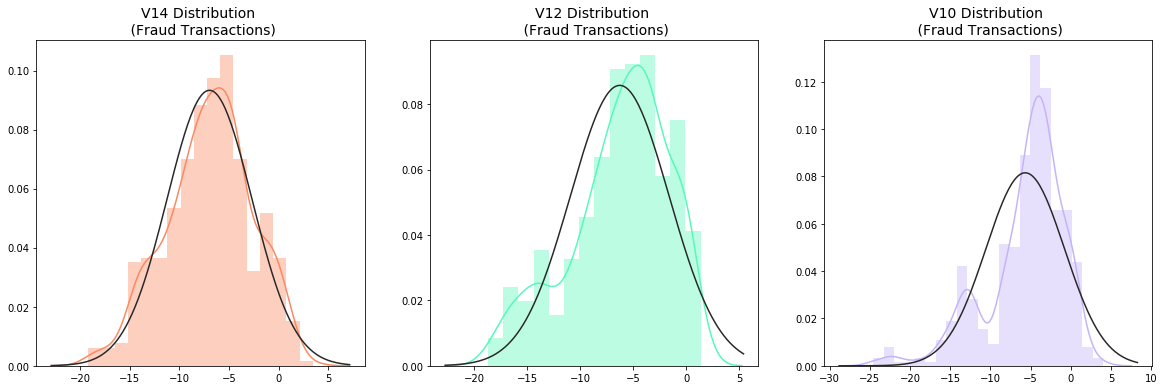

In [15]:
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_data['V14'].loc[new_data['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_data['V12'].loc[new_data['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_data['V10'].loc[new_data['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()

### UnderSampling the data

In this section we train and test on the new data. If first split them into train and test.

X contains the fetures of the data and y contains the target values

In [16]:
X = new_data.drop('Class', axis =1).values
y = new_data['Class'].values

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

### Building the model with keras

Using 3 layers of fully connected network with help of keras library. 

1) First layer is input layer with 30 input neurons and 30 output neurons.

2) Second layer is hidden layer with 30 input neurons and 32 output neurons.

3) Final layer is output layer with 32 input neurons and 1 output neuron.

Using Adam optimizer and loss function as binary crossentropy as our target values are numerical binary format(0 or 1).

In [18]:
from keras.models import Sequential
from keras.layers import Dense
undersample_model = Sequential()
undersample_model.add(Dense(30, input_shape = (30,), activation = 'relu'))
undersample_model.add(Dense(32,activation = 'relu'))
undersample_model.add(Dense(1,activation = 'sigmoid'))
undersample_model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


In [19]:
undersample_model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'] )

In [20]:
undersample_model.fit(X_train,y_train, validation_split = 0.2, batch_size = 25, shuffle =True, verbose =2, epochs = 20)

Instructions for updating:
Use tf.cast instead.
Train on 629 samples, validate on 158 samples
Epoch 1/20
 - 8s - loss: 0.6177 - acc: 0.6709 - val_loss: 0.4195 - val_acc: 0.7975
Epoch 2/20
 - 0s - loss: 0.3470 - acc: 0.8728 - val_loss: 0.3230 - val_acc: 0.8734
Epoch 3/20
 - 0s - loss: 0.2722 - acc: 0.9205 - val_loss: 0.2743 - val_acc: 0.9051
Epoch 4/20
 - 0s - loss: 0.2239 - acc: 0.9348 - val_loss: 0.2492 - val_acc: 0.9241
Epoch 5/20
 - 0s - loss: 0.1896 - acc: 0.9412 - val_loss: 0.2323 - val_acc: 0.9177
Epoch 6/20
 - 0s - loss: 0.1662 - acc: 0.9475 - val_loss: 0.2198 - val_acc: 0.9114
Epoch 7/20
 - 0s - loss: 0.1490 - acc: 0.9539 - val_loss: 0.2033 - val_acc: 0.9241
Epoch 8/20
 - 0s - loss: 0.1372 - acc: 0.9539 - val_loss: 0.2024 - val_acc: 0.9177
Epoch 9/20
 - 0s - loss: 0.1284 - acc: 0.9603 - val_loss: 0.1992 - val_acc: 0.9177
Epoch 10/20
 - 0s - loss: 0.1194 - acc: 0.9571 - val_loss: 0.1983 - val_acc: 0.9177
Epoch 11/20
 - 0s - loss: 0.1150 - acc: 0.9618 - val_loss: 0.1974 - val_acc

In [21]:
undersample_pred = undersample_model.predict(original_Xtest)

Don't use accuracy score as a metric with imbalanced datasets (will be usually high and misleading), instead use f1-score, precision/recall score or confusion matrix

### Using Confusion matrix to plot how the features are classification.

It is also useful to check whether our model is baised or not

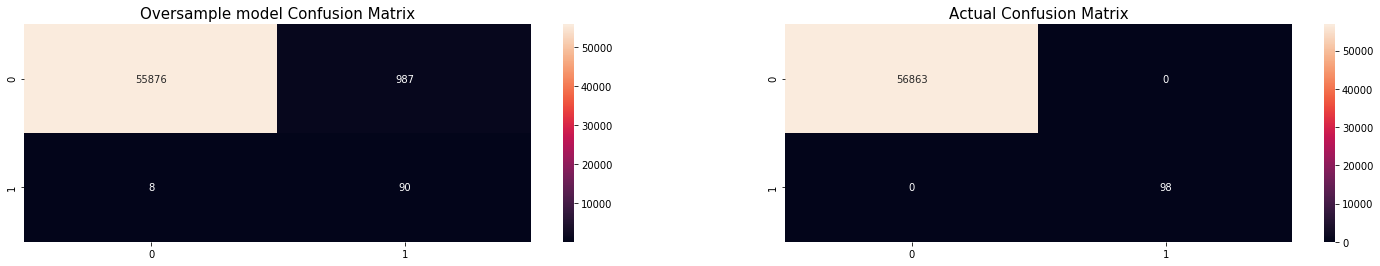

In [36]:
from sklearn.metrics import confusion_matrix

fig ,ax = plt.subplots(1,2,figsize = (25,4))


sns.heatmap(confusion_matrix(original_ytest, undersample_pred.round()),annot = True, ax =ax[0], fmt = 'g')
ax[0].set_title('Undersample model Confusion Matrix', fontsize = 15)

actual_matrix = confusion_matrix(original_ytest, original_ytest)
sns.heatmap(actual_matrix, annot =True, ax = ax[1], fmt = 'g')
ax[1].set_title('Actual Confusion Matrix', fontsize = 15)

plt.show()

### OverSampling the data 

### Using SMOTE for Oversampling

SMOTE stands for Synthetic Minority Over-sampling Technique. Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems".

#### Understanding SMOTE:

Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.

In [26]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(ratio='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)

Here we are using the same model as in the undersampling model to check is there any difference when using the Undersampled or Oversampled data.

In [28]:
oversample_model = Sequential()
oversample_model.add(Dense(30, input_shape = (30,), activation = 'relu'))
oversample_model.add(Dense(32,activation = 'relu'))
oversample_model.add(Dense(1,activation = 'sigmoid'))
oversample_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                992       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 1,955
Trainable params: 1,955
Non-trainable params: 0
_________________________________________________________________


In [29]:
oversample_model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'] )

In [30]:
oversample_model.fit(Xsm_train,ysm_train, validation_split = 0.2,epochs = 10, batch_size = 25, verbose = 2, shuffle = True)

Train on 363923 samples, validate on 90981 samples
Epoch 1/10
 - 190s - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0273 - val_acc: 0.9932
Epoch 2/10
 - 184s - loss: 0.0066 - acc: 0.9985 - val_loss: 0.0081 - val_acc: 0.9989
Epoch 3/10
 - 189s - loss: 0.0043 - acc: 0.9990 - val_loss: 0.0013 - val_acc: 0.9999
Epoch 4/10
 - 184s - loss: 0.0034 - acc: 0.9992 - val_loss: 8.4157e-04 - val_acc: 0.9999
Epoch 5/10
 - 203s - loss: 0.0028 - acc: 0.9993 - val_loss: 9.0027e-04 - val_acc: 0.9999
Epoch 6/10
 - 189s - loss: 0.0027 - acc: 0.9994 - val_loss: 0.0159 - val_acc: 0.9965
Epoch 7/10
 - 181s - loss: 0.0024 - acc: 0.9994 - val_loss: 3.4592e-04 - val_acc: 1.0000
Epoch 8/10
 - 182s - loss: 0.0021 - acc: 0.9995 - val_loss: 8.5553e-04 - val_acc: 0.9999
Epoch 9/10
 - 161s - loss: 0.0017 - acc: 0.9996 - val_loss: 2.7012e-04 - val_acc: 0.9999
Epoch 10/10
 - 180s - loss: 0.0019 - acc: 0.9995 - val_loss: 1.5875e-04 - val_acc: 1.0000


In [31]:
oversample_pred = oversample_model.predict(original_Xtrain)

In [32]:
np.shape(oversample_pred)

(227846, 1)

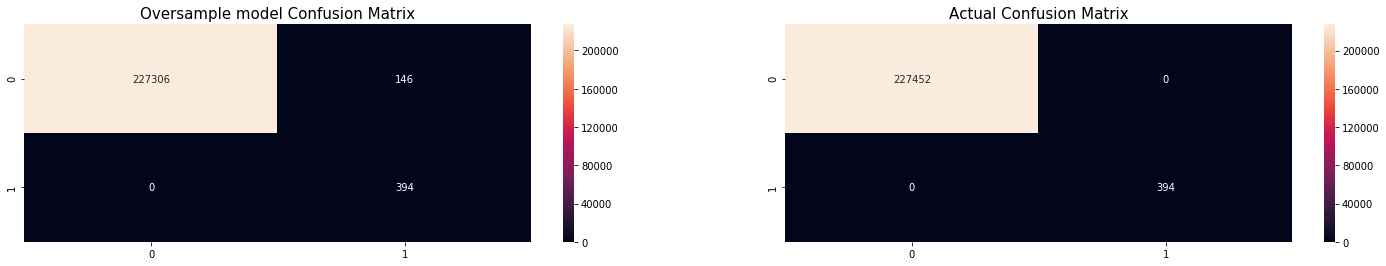

In [34]:
fig ,ax = plt.subplots(1,2,figsize = (25,4))

oversample_matrix = confusion_matrix(original_ytrain, oversample_pred.round())
sns.heatmap(oversample_matrix,annot = True,fmt = 'g', ax =ax[0])
ax[0].set_title('Oversample model Confusion Matrix', fontsize = 15)

actual_matrix = confusion_matrix(original_ytrain, original_ytrain)
sns.heatmap(actual_matrix, annot =True, fmt = 'g',ax = ax[1])
ax[1].set_title('Actual Confusion Matrix', fontsize = 15)

plt.show()

### Conclusion:- 

From this notbook we can see that how to handle imbalanced data. 

We can also see the difference between the oversampled data and undersampled data.